# Subject: Data Science Foundation

## Session 8 - Probability distributions

### Demo 1 -  Probability Distributions

Many statistical tools and techniques used in data analysis are based on probability. Probability measures how likely it is for an event to occur on a scale from 0 (the event never occurs) to 1 (the event always occurs.). When working with data, variables in the columns of the data set can be thought of as random variables: variables that vary due to chance. A probability distribution describes how a random variable is distributed; it tells us which values a random variable is most likely to take on and which values are less likely.
In statistics, there are a range of precisely defined probability distributions that have different shapes and can be used to model different types of random events. In this lesson we'll discuss some common probability distributions and how to work with them in Python.

# 1. Conditional probability 

In probability theory, conditional probability is a measure of the probability of an event given that another event has occurred.

In probability theory and statistics, given two jointly distributed random variables X and Y, the conditional probability distribution of Y given X is the probability distribution of Y when X is known to be a particular value; in some cases the conditional probabilities may be expressed as functions containing the unspecified value x of X as a parameter. When both "X" and "Y" are categorical variables, a conditional probability table is typically used to represent the conditional probability. The conditional distribution contrasts with the marginal distribution of a random variable, which is its distribution without reference to the value of the other variable.

If the conditional distribution of Y given X is a continuous distribution, then its probability density function is known as the conditional density function. The properties of a conditional distribution, such as the moments, are often referred to by corresponding names such as the conditional mean and conditional variance.

More generally, one can refer to the conditional distribution of a subset of a set of more than two variables; this conditional distribution is contingent on the values of all the remaining variables, and if more than one variable is included in the subset then this conditional distribution is the conditional joint distribution of the included variables.

https://en.wikipedia.org/wiki/Conditional_probability_distribution

# 1.1. Calculate conditional probabilites of ratings('A','B','C') in ratings column

In [ ]:

    company     model    rating   type
0   ford       mustang     A      coupe
1   chevy      camaro      B      coupe
2   ford       fiesta      C      sedan
3   ford       focus       A      sedan
4   ford       taurus      B      sedan
5   toyota     camry       B      sedan


Output:
    
Prob(rating=A) = 0.333333 
Prob(rating=B) = 0.500000 
Prob(rating=C) = 0.166667 

Prob(type=coupe|rating=A) = 0.500000 
Prob(type=sedan|rating=A) = 0.500000 
Prob(type=coupe|rating=B) = 0.333333 
Prob(type=sedan|rating=B) = 0.666667 
Prob(type=coupe|rating=C) = 0.000000 
Prob(type=sedan|rating=C) = 1.000000 




In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
data = {'company': ['ford', 'chevy', 'ford', 'ford', 'ford', 'toyota'], 
        'model': ['mustang', 'camaro', 'fiesta', 'focus', 'taurus', 'camry'], 
        'rating': ['A', 'B', 'C', 'A', 'B', 'B'],
        'type': ['coupe', 'coupe', 'sedan', 'sedan', 'sedan', 'sedan']}
df = pd.DataFrame(data, columns = ['company', 'model', 'rating', 'type'])
df

,company,model,rating,type
0,ford,mustang,A,coupe
1,chevy,camaro,B,coupe
2,ford,fiesta,C,sedan
3,ford,focus,A,sedan
4,ford,taurus,B,sedan
5,toyota,camry,B,sedan


In [4]:
df.groupby('rating').count()['model']

rating
A    2
B    3
C    1
Name: model, dtype: int64

In [5]:
len(df)

6

In [6]:
df.groupby('rating').count()['model'] / len(df)

rating
A    0.333333
B    0.500000
C    0.166667
Name: model, dtype: float64

In [7]:
df.groupby(['rating', 'type']).count()

company  model
rating type                 
A      coupe        1      1
       sedan        1      1
B      coupe        1      1
       sedan        2      2
C      sedan        1      1

In [8]:
df.groupby('rating').count()['model']

rating
A    2
B    3
C    1
Name: model, dtype: int64

In [9]:
(df.groupby(['rating', 'type']).count() / df.groupby('rating').count())['model']

rating  type 
A       coupe    0.500000
        sedan    0.500000
B       coupe    0.333333
        sedan    0.666667
C       sedan    1.000000
Name: model, dtype: float64

Me: In this case, it's the possibility of grabbing a coupe or sedan in A. So each Rating will sum up to 1. Obviously, the chances of grabbing randomly a C rating and it being a sedan is always 1 as you only have 1. In this case, A is rating and B is type

# 2. Probability distributions

The probability distribution is a description of a random phenomenon in terms of the probabilities of events. 
Probability distributions are generally divided into two classes. 

1) A discrete probability distribution (applicable to the scenarios where the set of possible outcomes is discrete, such as a coin toss) can be encoded by a discrete list of the probabilities of the outcomes, known as a Probability Mass Function (PMF). 

In probability and statistics, a Probability Mass Function (PMF) is a function that gives the probability that a discrete random variable is exactly equal to some value. The probability distribution of a discrete random variable is a list of probabilities associated with each of its possible values.
A discrete variable is a variable which can only take a countable number of values. For example, if a coin is tossed three times, the number of heads can only take 4 values (0, 1, 2, 3) and so the variable is discrete. The variable is said to be random if the sum of the probabilities is one.  

The value of the random variable having the largest probability mass is called the mode.

All the values of this function must be non-negative and sum up to 1.

2) On the other hand, a continuous probability distribution (applicable to the scenarios where the set of possible outcomes can take on values in a continuous range (e.g. real numbers), such as the temperature on a given day) is typically described by Probability Density Functions (PDF) (with the probability of any individual outcome actually being 0). 


A Probability Mass Function (PMF) differs from a Probability Density Function (PDF) in that the latter is associated with continuous rather than discrete random variables; the values of the Probability Density Function (PDF) are not probabilities as such: a PDF must be integrated over an interval to yield a probability.


https://en.wikipedia.org/wiki/Probability_distribution
 


# 1. The Uniform Distribution

The uniform distribution is a probability distribution where each value within a certain range is equally likely to occur and values outside of the range never occur. 


In probability theory and statistics, the discrete uniform distribution is a symmetric probability distribution whereby a finite number of values are equally likely to be observed; every one of n values has equal probability 1/n. Another way of saying "discrete uniform distribution" would be "a known, finite number of outcomes equally likely to happen".

https://en.wikipedia.org/wiki/Discrete_uniform_distribution

If we make a density plot of a uniform distribution, it appears flat because no value is any more likely (and hence has any more density) than another.
Many useful functions for working with probability distributions in Python are contained in the scipy.stats library. Let's load in some libraries, generate some uniform data and plot a density curve:

In [10]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [20]:
uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                 scale=10)     # To 10

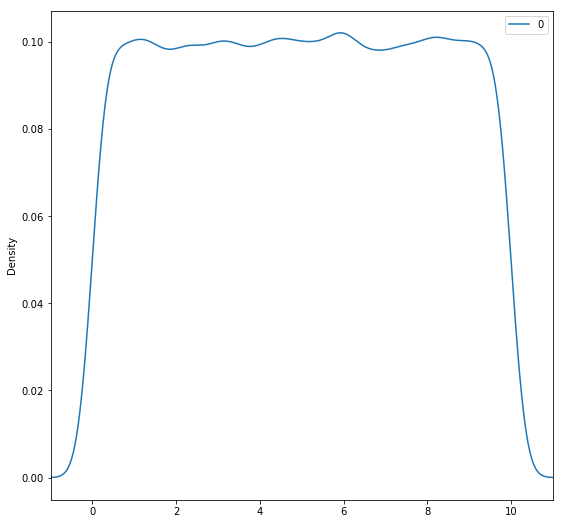

In [22]:
pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution. Me: density is to see probability.
                               figsize=(9,9),
                               xlim=(-1,11))     #me: the limits of the table. It's just to see better the shape rather than just cutting it in the limits, just to give a margin (so we give changui de 1.)

*Note: the plot above is an approximation of the underlying distribution, since it is based on a sample of observations.
In the code above, we generated 100,000 data points from a uniform distribution spanning the range 0 to 10. In the density plot, we see that the density of our uniform data is essentially level meaning any given value has the same probability of occurring. The area under a probability density curve is always equal to 1.

## Probability distributions in scipy come with several useful functions for generating random data and extracting values of interest:

-*stats.distribution.rvs()* generates random numbers from the specified distribution. The arguments to rvs() will vary depending on the type of distribution you're working with; in the case of the uniform distribution, we have to specify the starting and ending points and the size (number of random points to generate.).

When you need to generate random real numbers in a range with equal probability you can draw numbers from a uniform distribution using *stats.distribution.rvs()*. Python also comes with a library called "random" that lets you perform various operations that involve randomization. Let's look at a few functions in the random library:

In [23]:
import random

In [30]:
random.randint(0,10)     # Get a random integer in the specified range

10

In [31]:
random.choice([2,4,6,9]) # Get a random element from a sequence

9

In [32]:
random.random()          # Get a real number between 0 and 1

0.5979900283507247

In [33]:
random.uniform(0,10)     # Get a real in the specified range

7.5288910710250505

-*stats.distribution.cdf()* is used to determine the probability that an observation drawn from a distribution falls below a specified value (known as the Cumulative Distribution Function (CDF)). In essence, cdf() gives you the area under the distribution's density curve to the left of a certain value on the x axis. For example, in the uniform distribution above, there is a 25% chance that an observation will be in the range 0 to 2.5 and a 75% chance it will fall in the range 2.5 to 10. We can confirm this with cdf():

In [36]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

0.25


-*stats.distribution.ppf()* is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. For instance, if we want to know the cutoff value for which we have a 40% chance of drawing an observation below that value, we can use ppf():

In [40]:
stats.uniform.ppf(q=0.25,        # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

2.5

-*stats.distribution.pdf()* gives you the probability density (height of the distribution) at a given x value. Since the uniform distribution is flat, all x values within its range will have the same probability density and x values outside the range have a probability density of 0:

In [43]:
for x in range(-1,12,3):                            #Me: los primeros valores son los limites, el segundo los intervalos (cada 3 dame un valor)
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )   

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


# 2. The Normal Distribution

The normal or Gaussian distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center (mean) and spread (standard deviation.). The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.

The normal distribution is perhaps the most important distribution in all of statistics. It turns out that many real world phenomena, like IQ test scores and human heights, roughly follow a normal distribution, so it is often used to model random variables. Many common statistical tests assume distributions are normal.

The scipy nickname for the normal distribution is norm. Let's investigate the normal distribution:

In [44]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.158655253931 0.158655253931 0.682689492137


The output shows that roughly 16% of the data generated by a normal distribution with mean 0 and standard deviation 1 is below -1, 16% is above 1 and 68% lies between -1 and 1, which agrees with the 68, 95, 99.7 rule. Let's plot the normal distribution and inspect areas we calculated:

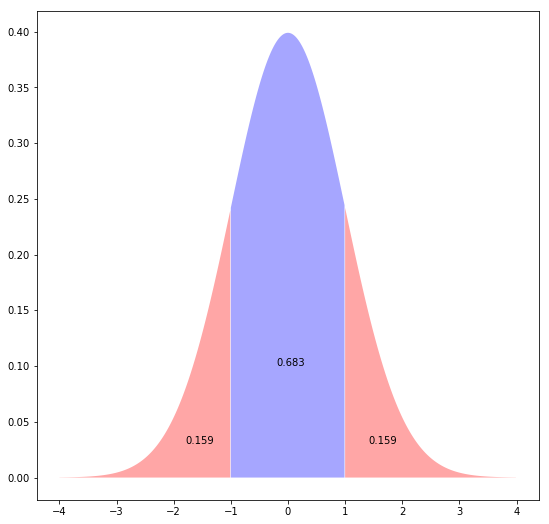

In [45]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3))

The plot above shows the bell shape of the normal distribution, the area below and above one standard deviation and the area within 1 standard deviation of the mean.
Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check normal distribution quantiles with *stats.norm.ppf()*:

In [46]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.95996398454
1.95996398454


The quantile output above confirms that roughly 5% of the data lies more than 2 standard deviations from the mean.

We use a range between two quantiles, usually the 2.5 centile and the 97.5 centile, which is called the normal range, 95% reference range, or 95% reference interval. This leaves 5% of normals outside the `normal range'.

*Note: a mean of 0 and standard deviation of 1 are default values for the normal distribution.

# 3. The Binomial Distribution

The binomial distribution is a discrete probability distribution that models the outcomes of a given number of random trails of some experiment or event. The binomial is defined by two parameters: the probability of success in any given trial and the number of trials. The binomial distribution tells you how likely it is to achieve a given number of successes in n trials of the experiment. For example, we could model flipping a fair coin 10 times with a binomial distribution where the number of trials is set to 10 and the probability of success is set to 0.5. In this case the distribution would tell us how likely it is to get zero heads, 1 head, 2 heads and so on.

The scipy name for the binomial is binom. Let's generate and investigate some binomial data:

col_0   0   1    2     3     4     5     6     7    8    9   10
row_0                                                          
counts  10  98  465  1180  1998  2440  2035  1192  460  115   7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112575e10>]], dtype=object)

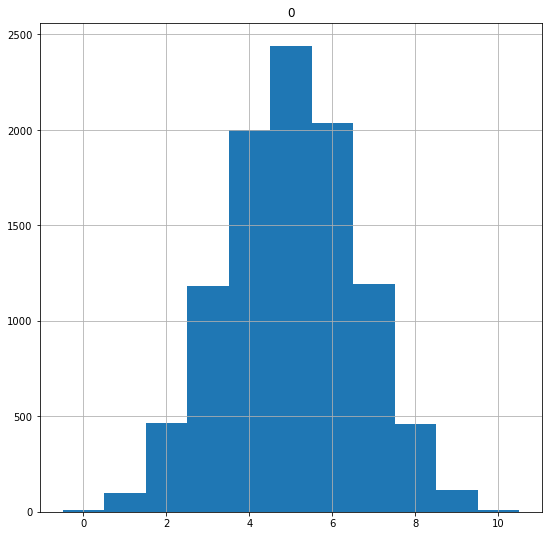

In [50]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11)

Note that since the binomial distribution is discrete, it only takes on integer values so we can summarize binomial data with a frequency table and its distribution with a histogram. The histogram shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. This is reminiscent of the normal distribution, but if we alter the success probability, the distribution won't be symmetric:

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts  12  61  265  867  2014  3037  2677  1067


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112856b70>]], dtype=object)

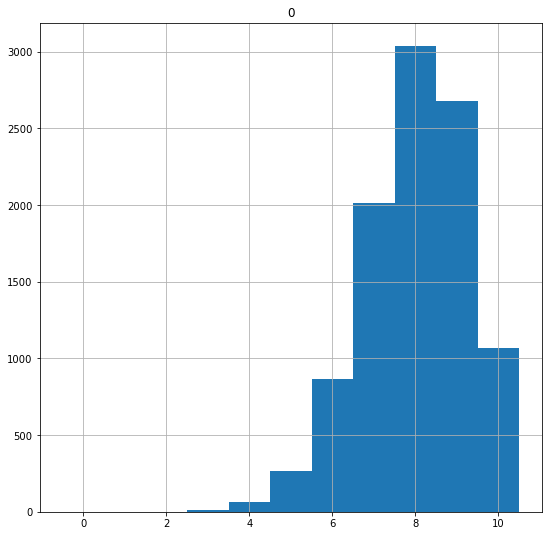

In [54]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11)

The cdf() function lets us check the probability of achieving a number of successes within a certain range:

In [56]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.032793497599999964

In [61]:
1 - stats.binom.cdf(k=8,        # Probability of k = 9 successes or more Me: it's 9 and not 8 because we are substracting it to 1
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000003

For continuous probability density functions, you use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k:

In [62]:
stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5

0.24609375000000025

In [64]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.30198988799999998

A pesar de tener mas chances, la vara es ma grande porque tenes que llegar a 8 de 10. Si volvemos al grafico anterior, vamos a poder ver que este numero nos dice que el 30% de los datos estan en la columna 8.

# 4. The Poisson Distribution

The Poisson distribution models the probability of seeing a certain number of successes within a time interval, where the time it takes for the next success is modeled by an exponential distribution. The Poisson distribution can be used to model traffic, such as the number of arrivals a hospital can expect in a hour's time or the number of emails you'd expect to receive in a week.
The scipy name for the Poisson distribution is "poisson". Let's generate and plot some data from a Poisson distribution with an arrival rate of 1 per time unit:

col_0      0     1     2    3    4   5  6  7  8
row_0                                          
counts  3701  3675  1793  643  143  36  7  1  1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116be74a8>]], dtype=object)

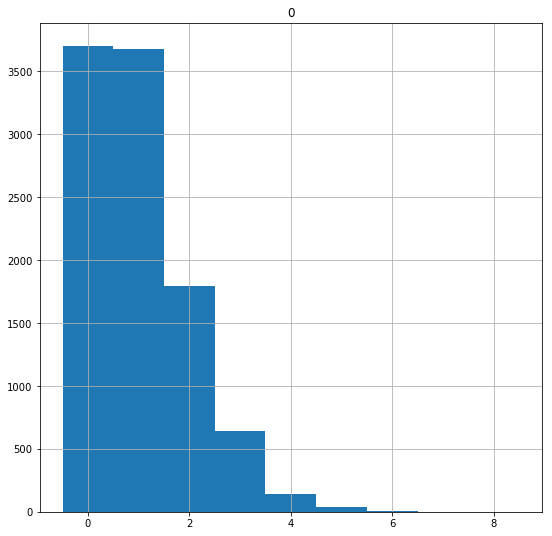

In [90]:
random.seed(12)  #todos los numeros random van a estar seteados desde el numero 12.

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1)

The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. When the arrival rate is high, it becomes increasingly rare to see a low number of arrivals and the distribution starts to look more symmetric:

col_0   0   1   2   3    4    5    6    7     8     9  ...   15   16   17  18  \
row_0                                                  ...                      
counts   1   5  24  63  213  372  661  906  1113  1286 ...  368  221  134  70   

col_0   19  20  21  22  23  24  
row_0                           
counts  35  14   9   4   2   1  

[1 rows x 25 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11718b780>]], dtype=object)

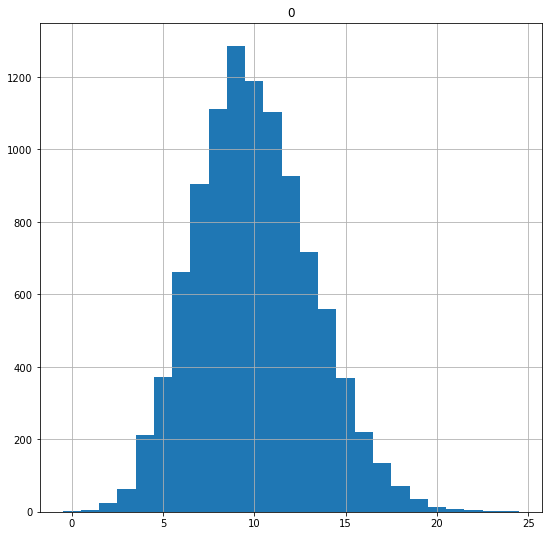

In [91]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1)

As with other discrete probability distributions, we can use cdf() to check the probability of achieving more or less than a certain number of successes and pmf() to check the probability of obtaining a specific number of successes:

In [92]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.067085962879031888

In [93]:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372